<h2 style='color:purple' align='center'>Build our first neural network in Keras for image classification problem</h2>

**We will use keras fashion MNIST dataset. This consist of 60000 28X28 pixel images and 10000 test images, these images are classified in one of the 10 categories shown below**




*   T-shirt/top
*   Trouser
*   Pullover
*   Dress
*   Coat
*   Sandal
*   Shirt
*   Sneaker
*   Bag
*   Ankle boot


Importing libraries

In [50]:
import keras
import numpy as np
import matplotlib.pyplot as plt

Keras does not manage all low-level calculations such as tensioner products, convolutions, etc. but rather relies on the specialized library of tensor manipulation that is optimized better to function as the backend engine.

In [2]:
keras.backend.backend()

'tensorflow'

Importing dataset

In [49]:
import tensorflow.keras as tk

mnist = tk.datasets.mnist

fm = tk.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fm.load_data()

In [61]:
import pandas as pd
import tensorflow as tf
df = tf.keras.datasets.fashion_mnist.load_data()
df = pd.DataFrame(df)
#df.to_csv('/content/fashion_mnist.csv')
df.head()

,0,1
0,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, ..."
1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, ..."


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [65]:
y_train[0]

9

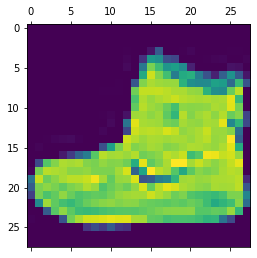

In [42]:
plt.matshow(X_train[0])

Normalize training data before training the neural network

In [66]:
X_train = X_train/255

In [67]:
X_test = X_test/255

<h3 style='color:purple'>Now build the Sequential Model and add layers into it</h3>

In [68]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])

In [71]:
model.fit(X_train, y_train)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.5076 - accuracy: 0.8227


In [72]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4409 - accuracy: 0.8476


[0.4408605396747589, 0.847599983215332]

**Above shows accuracy score of 82.76%. The first parameter is loss**

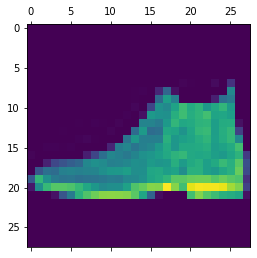

In [73]:
plt.matshow(X_test[0])

In [74]:
yp = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [84]:
np.argmax(yp[0])

9

In [76]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [77]:
class_labels[np.argmax(yp[0])]

'Ankle boot'